<a href="https://colab.research.google.com/github/HariTarz/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#Importing necessary libraries

In [29]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Mounting my google drive

In [3]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Creating path variable for both the datasets

In [4]:
#creating data files path and reading the csv files
playstore_data_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Cohort Amsot/Module 1/EDA Capstone Project/Play store Review Analysis/dat/Play Store Data.csv'
playstore_df = pd.read_csv(playstore_data_path)
user_reviews_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Cohort Amsot/Module 1/EDA Capstone Project/Play store Review Analysis/dat/User Reviews.csv'
user_reviews_df = pd.read_csv(user_reviews_path)

#Viewing data set features, values and struture  

In [6]:
#viewing playstore dataframe
playstore_df.head(-1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


In [9]:
#viewing info of playstore dataframe
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [11]:
playstore_df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [12]:
playstore_df.drop(playstore_df[playstore_df['Genres']=='February 11, 2018'].index, inplace=True)
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [13]:
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#Cleaning the data

In [14]:
#Clean string function
def clean_it(num):
  if '+' in num:
    num = num.replace('+','')
  if ',' in num:
    num = num.replace(',','')
  if '$' in num:
    num = num.replace('$','')
  else:
    pass
  return num

In [15]:
playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'].map(lambda x: clean_it(x)))
playstore_df['Price'] = pd.to_numeric(playstore_df['Price'].map(lambda x: clean_it(x)))
playstore_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'])
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [16]:
dupli_col_chk = playstore_df['App'].duplicated().any()
dupli_col_chk

True

In [17]:
playstore_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [55]:
#taking all the last rows of data for each app
ps_last_r_df = playstore_df.groupby('App').tail(1).reset_index()
app_rev_max_df = ps_last_r_df.loc[ps_last_r_df.groupby(['App'])['Reviews'].idxmax()]

In [56]:
top_genres = app_rev_max_df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [57]:
top_genres

,Genres,Count
0,Tools,828
1,Entertainment,561
2,Education,510
3,Business,419
4,Medical,396
...,...,...
113,Health & Fitness;Action & Adventure,1
114,Art & Design;Pretend Play,1
115,Travel & Local;Action & Adventure,1
116,Trivia;Education,1


In [84]:
genres_installs = app_rev_max_df.groupby(['Genres'])[['Installs']].sum()
genres_installs

,Installs
Genres,
Action,3483039190
Action;Action & Adventure,53020500
Adventure,296695320
Adventure;Action & Adventure,106150000
Adventure;Brain Games,100000
...,...
Trivia;Education,100
Video Players & Editors,3917002720
Video Players & Editors;Music & Video,15000000


In [85]:
genres_ratings = app_rev_max_df.groupby(['Genres'])[['Rating']].mean()
genres_ratings

,Rating
Genres,
Action,4.244863
Action;Action & Adventure,4.316667
Adventure,4.178873
Adventure;Action & Adventure,4.300000
Adventure;Brain Games,4.600000
...,...
Trivia;Education,NaN
Video Players & Editors,4.043243
Video Players & Editors;Music & Video,4.000000


In [89]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings, on='Genres')
top_50_genres = top_genres_installs_ratings.head(50)
top_50_genres

,Genres,Count,Installs,Rating
0,Tools,828,8092771915,4.039638
1,Entertainment,561,3014714684,4.083439
2,Education,510,262910148,4.290909
3,Business,419,692164865,4.096565
4,Medical,396,39203077,4.169416
5,Personalization,376,1532494782,4.332215
6,Productivity,374,5788091369,4.183389
7,Lifestyle,368,493823539,4.093667
8,Finance,345,455348734,4.115563
9,Sports,331,1412474498,4.223308


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Genres')

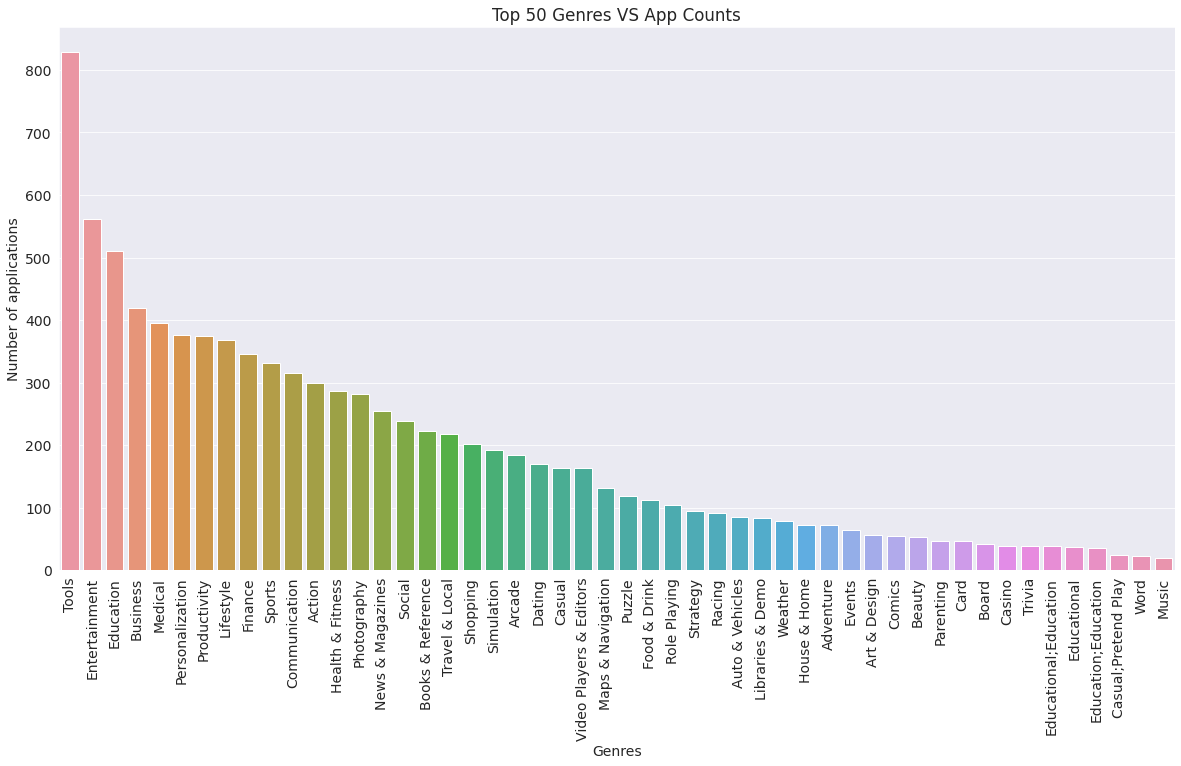

In [90]:
sns.barplot(top_50_genres.Genres, top_50_genres.Count)
plt.rcParams['figure.figsize'] = (20, 10)
plt.rc('font', size=14) 
plt.xticks(rotation=90)
plt.title('Top 50 Genres VS App Counts')
plt.ylabel('Number of applications')
plt.xlabel('Genres')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Genres')

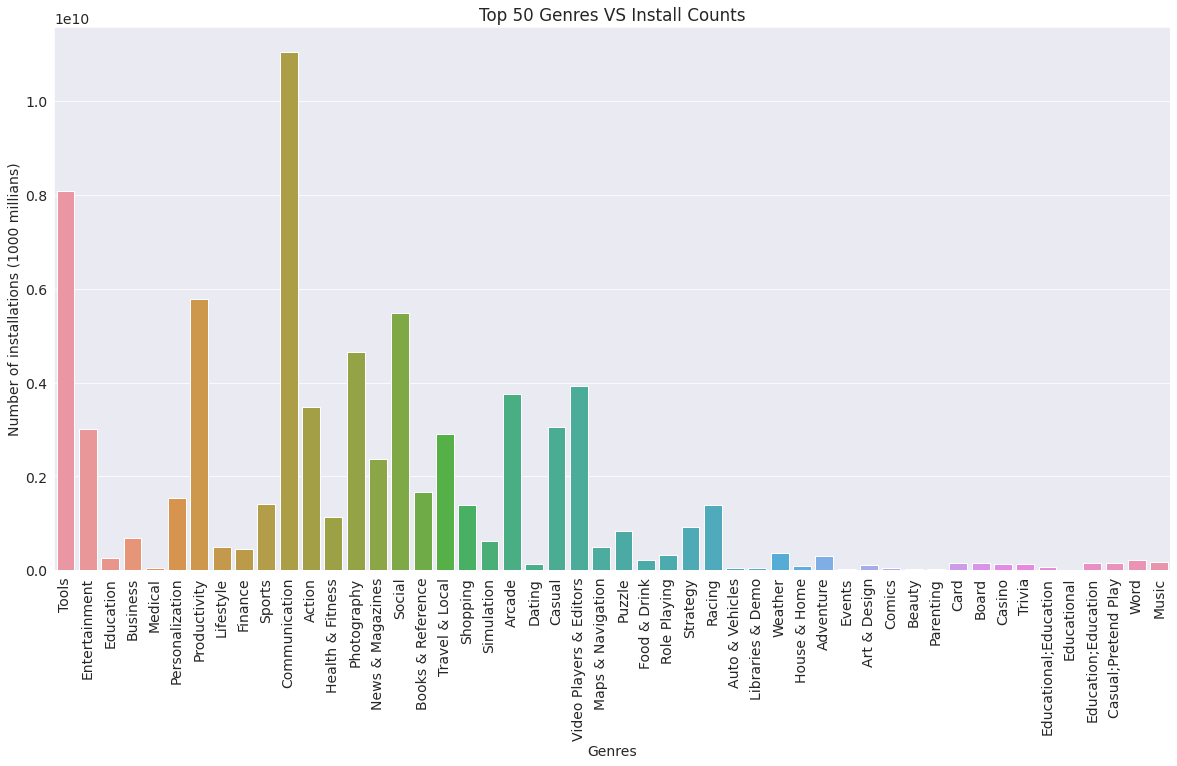

In [92]:
sns.barplot(top_50_genres.Genres, top_50_genres.Installs )
plt.rcParams['figure.figsize'] = (20, 10)
plt.rc('font', size=14) 
plt.xticks(rotation=90)
plt.title('Top 50 Genres VS Install Counts')
plt.ylabel('Number of installations (1000 millians)')
plt.xlabel('Genres')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Genres')

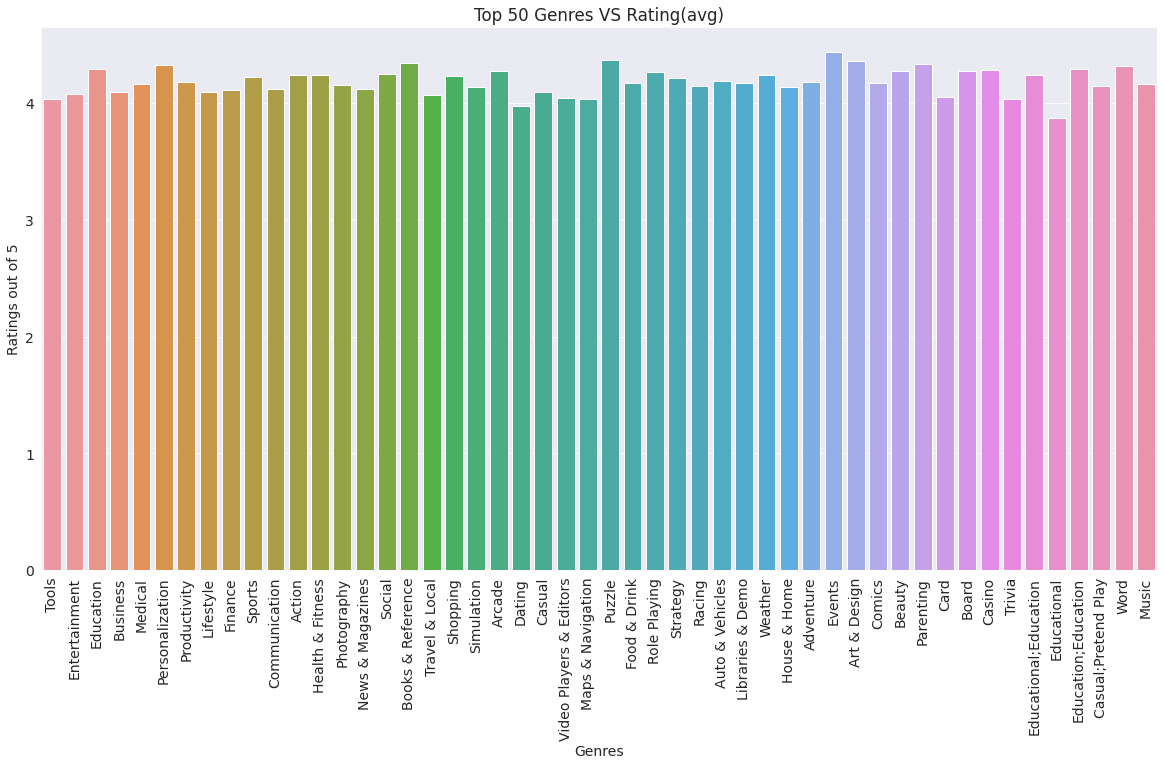

In [123]:
sns.barplot(top_50_genres.Genres, top_50_genres.Rating)
plt.rcParams['figure.figsize'] = (20, 10)
plt.rc('font', size=14) 
plt.xticks(rotation=90)
plt.title('Top 50 Genres VS Rating(avg)')
plt.ylabel('Ratings out of 5')
plt.xlabel('Genres')

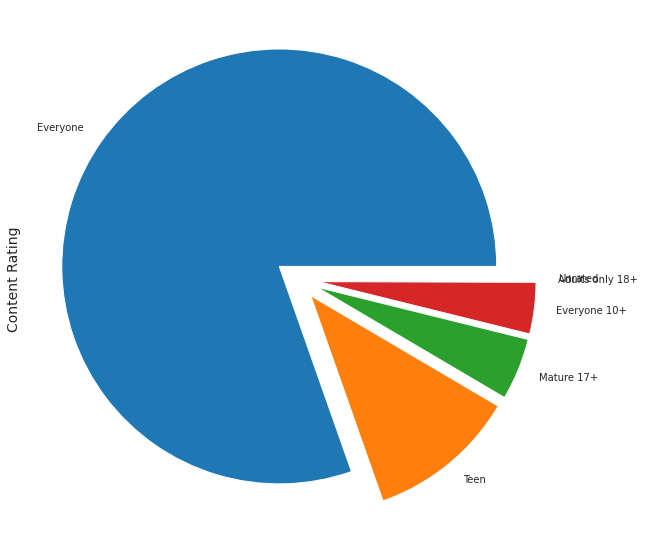

In [126]:
playstore_df['Content Rating'].value_counts().plot(kind='pie', fontsize=10, explode= (0.1,0.1,0.1,0.1,0.1,0.1))
# .Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})